In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="elxQ9ccu3kaxTrlvDIJT")
project = rf.workspace("mlma-project").project("mlma-segmentation-final")
version = project.version(3)
dataset = version.download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import json
with open("/content/MLMA-Segmentation-Final-3/train/_annotations.coco.json") as f:
  data = json.load(f)

In [ ]:
print(data)

{'info': {'year': '2025', 'version': '3', 'description': 'Exported from roboflow.com', 'contributor': '', 'url': 'https://public.roboflow.com/object-detection/undefined', 'date_created': '2025-04-26T13:29:04+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/licenses/by/4.0/', 'name': 'CC BY 4.0'}], 'categories': [{'id': 0, 'name': 'Needle-Vein', 'supercategory': 'none'}, {'id': 1, 'name': 'Needle', 'supercategory': 'Needle-Vein'}, {'id': 2, 'name': 'Vein', 'supercategory': 'Needle-Vein'}], 'images': [{'id': 0, 'license': 1, 'file_name': 'iOCT_image_47_4805980000_jpg.rf.176bf258ae545b7d7153d70580f24675.jpg', 'height': 480, 'width': 640, 'date_captured': '2025-04-26T13:29:04+00:00', 'extra': {'user_tags': ['Eggs_03_05_07'], 'name': 'iOCT_image_47.4805980000.jpg'}}, {'id': 1, 'license': 1, 'file_name': 'iOCT_image_47_6345850000_jpg.rf.2dfcda2d24239bde3b62dc09fa34e4b7.jpg', 'height': 480, 'width': 640, 'date_captured': '2025-04-26T13:29:04+00:00', 'extra': {'user_tags': [

In [ ]:
!pip install pycocotools

In [ ]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import json
import pandas as pd
from collections import Counter

print("Keys in the annotations file:", data.keys())

print("\nCategories:")
for cat in data['categories']:
    print(f"ID: {cat['id']}, Name: {cat['name']}")

ann_categories = [ann['category_id'] for ann in data['annotations']]
category_counts = Counter(ann_categories)
print("\nAnnotation counts by category ID:")
for cat_id, count in category_counts.items():
    cat_name = next((cat['name'] for cat in data['categories'] if cat['id'] == cat_id), "Unknown")
    print(f"Category ID: {cat_id}, Name: {cat_name}, Count: {count}")

print("\nSample annotation:")
print(json.dumps(data['annotations'][0], indent=2))


print("\nSample image info:")
print(json.dumps(data['images'][0], indent=2))

print(f"\nTotal number of images: {len(data['images'])}")
print(f"Total number of annotations: {len(data['annotations'])}")

img_with_anns = set()
for ann in data['annotations']:
    img_with_anns.add(ann['image_id'])
print(f"Number of images with annotations: {len(img_with_anns)}")

Keys in the annotations file: dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

Categories:
ID: 0, Name: Needle-Vein
ID: 1, Name: Needle
ID: 2, Name: Vein

Annotation counts by category ID:
Category ID: 1, Name: Needle, Count: 2147
Category ID: 2, Name: Vein, Count: 270

Sample annotation:
{
  "id": 0,
  "image_id": 0,
  "category_id": 1,
  "bbox": [
    371,
    450,
    19,
    29
  ],
  "area": 551,
  "segmentation": [
    [
      372,
      451,
      371,
      458,
      381,
      479,
      390,
      479,
      377,
      450
    ]
  ],
  "iscrowd": 0
}

Sample image info:
{
  "id": 0,
  "license": 1,
  "file_name": "iOCT_image_47_4805980000_jpg.rf.176bf258ae545b7d7153d70580f24675.jpg",
  "height": 480,
  "width": 640,
  "date_captured": "2025-04-26T13:29:04+00:00",
  "extra": {
    "user_tags": [
      "Eggs_03_05_07"
    ],
    "name": "iOCT_image_47.4805980000.jpg"
  }
}

Total number of images: 2157
Total number of annotations: 2417
Number of images w

In [ ]:
sample_img_path = "/content/MLMA-Segmentation-Final-3/train/iOCT_image_102_2540960000_jpg.rf.4414c47525507b12d4f3a3ba1ca6b87c.jpg"
annotations_train = "/content/MLMA-Segmentation-Final-3/train/_annotations.coco.json"
sample_img_name = os.path.basename(sample_img_path)

In [ ]:
coco = COCO(annotations_train)
needle_id = 1
img_id = None
for img_info in coco.loadImgs(coco.getImgIds()):
    if img_info['file_name'] == sample_img_name:
        img_id = img_info['id']
        break

if img_id is None:
    print(f"Image {sample_img_name} not found in the annotations")
else:
    print(f"Found image ID: {img_id}")

    # Get image info
    img_info = coco.loadImgs(img_id)[0]

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Found image ID: 37


In [ ]:
img = coco.imgs[img_id]
img

{'id': 37,
 'license': 1,
 'file_name': 'iOCT_image_102_2540960000_jpg.rf.4414c47525507b12d4f3a3ba1ca6b87c.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2025-04-26T13:29:04+00:00',
 'extra': {'user_tags': ['Eggs_03_05_07'],
  'name': 'iOCT_image_102.2540960000.jpg'}}

In [ ]:
img_dir = "/content/MLMA-Segmentation-Final-3/train"

Image information: {'id': 37, 'license': 1, 'file_name': 'iOCT_image_102_2540960000_jpg.rf.4414c47525507b12d4f3a3ba1ca6b87c.jpg', 'height': 480, 'width': 640, 'date_captured': '2025-04-26T13:29:04+00:00', 'extra': {'user_tags': ['Eggs_03_05_07'], 'name': 'iOCT_image_102.2540960000.jpg'}}
Found 1 needle annotations for this image


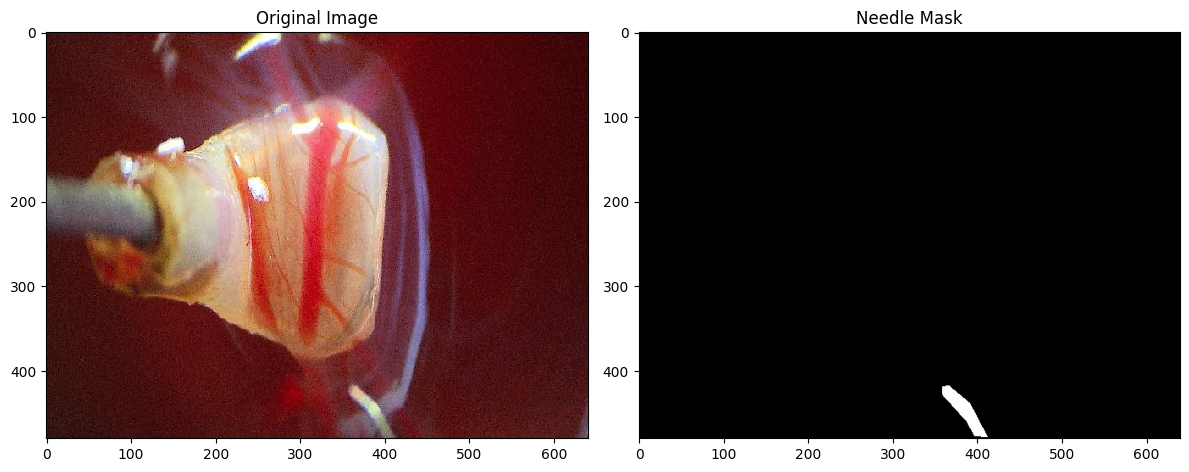

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import cv2
from PIL import Image
import os


img_id = 37
img_info = coco.loadImgs(img_id)[0]
print(f"Image information: {img_info}")

file_name = img_info['file_name']
img_path = os.path.join(img_dir, file_name)
needle_cat_id = 1
ann_ids = coco.getAnnIds(imgIds=img_id, catIds=[needle_cat_id])
needle_anns = coco.loadAnns(ann_ids)
print(f"Found {len(needle_anns)} needle annotations for this image")

image = np.array(Image.open(img_path))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, interpolation='nearest')
plt.title("Original Image")

mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
if len(needle_anns) > 0:
    for ann in needle_anns:
        ann_mask = coco.annToMask(ann)
        mask += ann_mask

    # Ensure mask is binary (values 0 or 1)
    mask = np.minimum(mask, 1)

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Needle Mask")

plt.tight_layout()
plt.show()

# # If you want to save the mask
# masks_dir = "/content/MLMA-Segmentation-Final-3/needle_masks"
# os.makedirs(masks_dir, exist_ok=True)
# mask_filename = f"{os.path.splitext(file_name)[0]}_needle_mask.png"
# mask_path = os.path.join(masks_dir, mask_filename)
# cv2.imwrite(mask_path, mask * 255)
# print(f"Saved needle mask to {mask_path}")

Loading COCO annotations...
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Starting mask generation process...
Starting to process 2157 images...


100%|██████████| 2157/2157 [00:05<00:00, 426.08it/s]


Completed! Generated masks for 2157 images.
Verifying a few random masks...


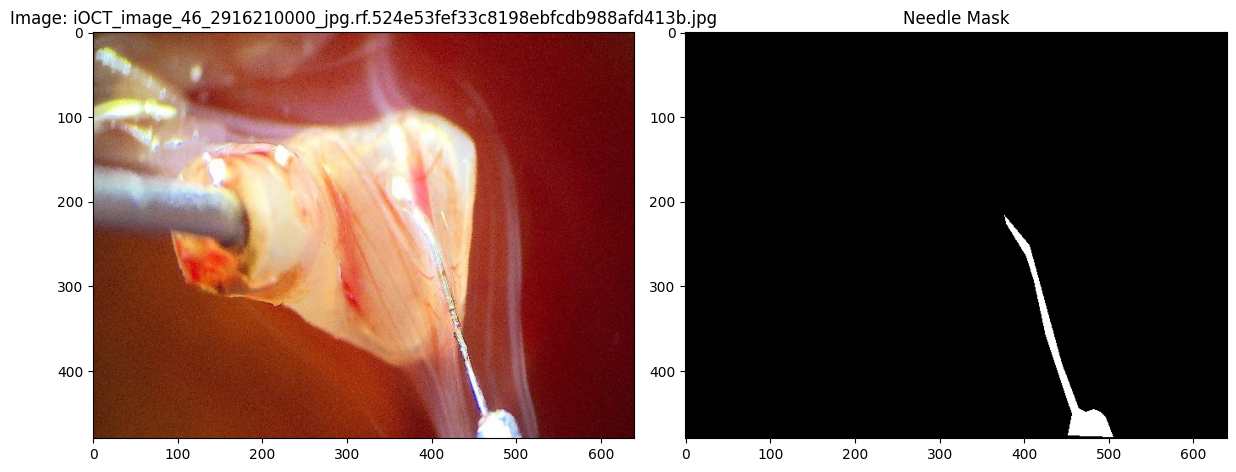

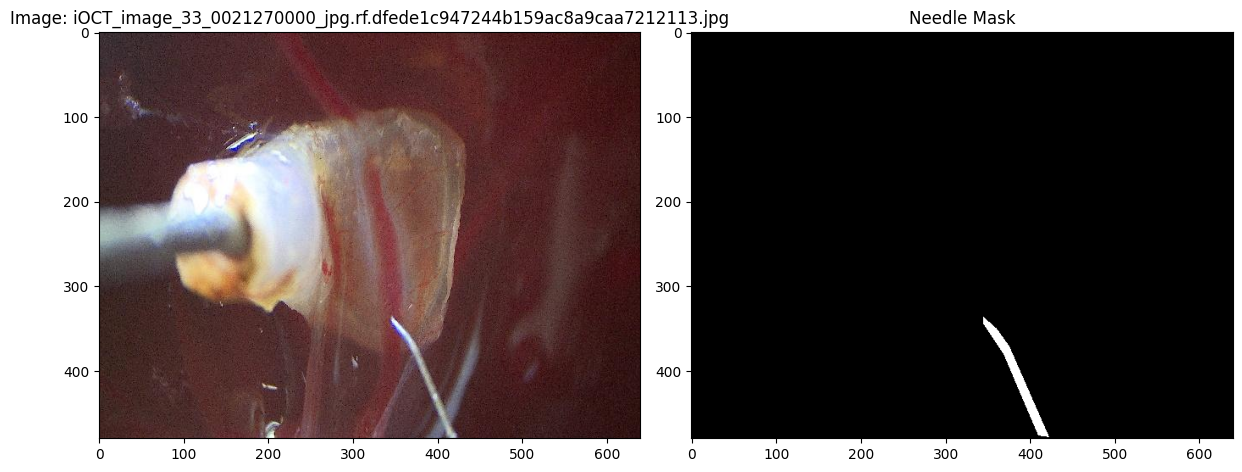

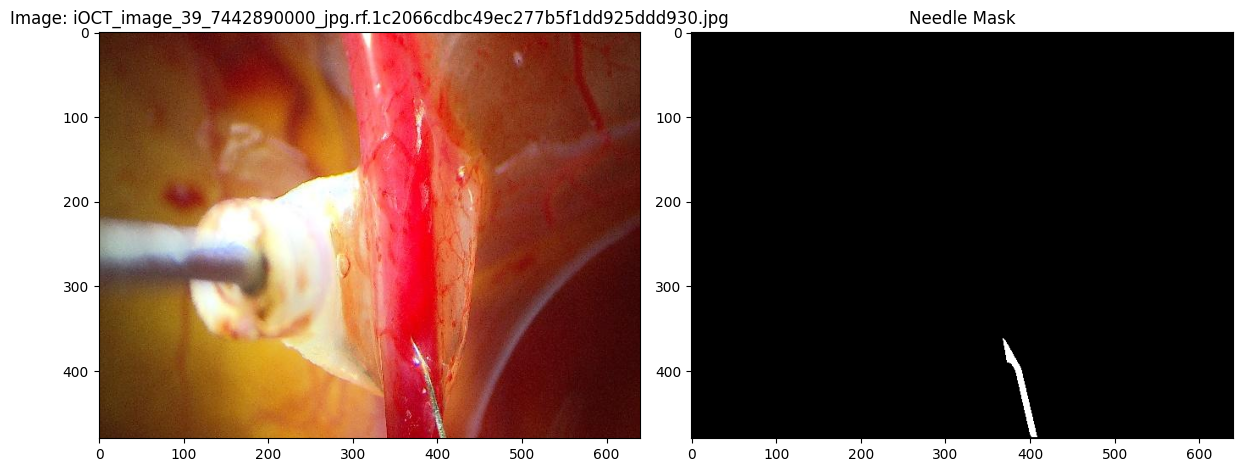

Generating mask statistics...
Total masks generated: 2157
Masks with needle annotations: 2131
Masks without needle annotations: 26
Average needle coverage in masks: 0.53%


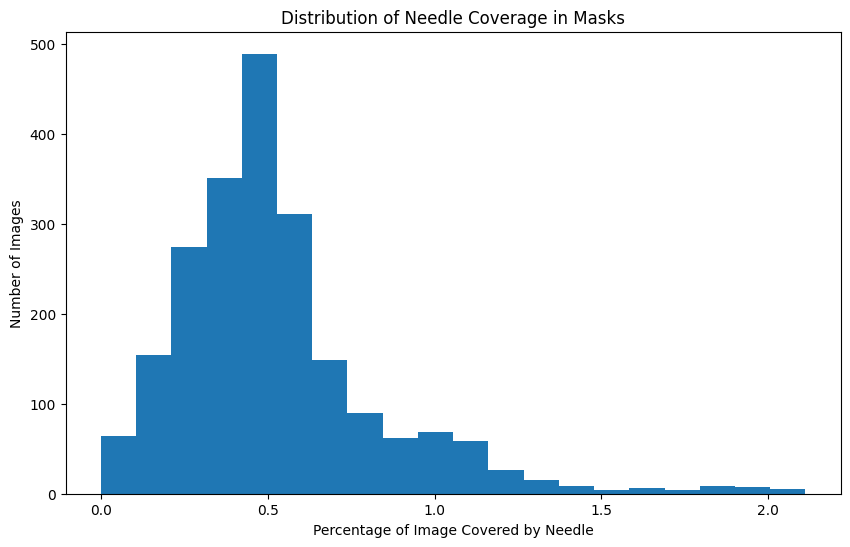

Process completed!


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path
from tqdm import tqdm

annotations_file = "/content/MLMA-Segmentation-Final-3/train/_annotations.coco.json"
img_dir = "/content/MLMA-Segmentation-Final-3/train"
masks_dir = "/content/MLMA-Segmentation-Final-3/needle_masks"
os.makedirs(masks_dir, exist_ok=True)

print("Loading COCO annotations...")
coco = COCO(annotations_file)

needle_cat_id = 1

def create_all_needle_masks():
    img_ids = coco.getImgIds()
    print(f"Starting to process {len(img_ids)} images...")

    for img_id in tqdm(img_ids):
        img_info = coco.loadImgs(img_id)[0]
        img_filename = img_info['file_name']
        ann_ids = coco.getAnnIds(imgIds=img_id, catIds=[needle_cat_id])
        needle_anns = coco.loadAnns(ann_ids)
        h, w = img_info['height'], img_info['width']
        mask = np.zeros((h, w), dtype=np.uint8)

        if len(needle_anns) > 0:
            for ann in needle_anns:
                ann_mask = coco.annToMask(ann)
                mask = np.maximum(mask, ann_mask)

        mask_filename = f"{Path(img_filename).stem}_needle_mask.png"
        mask_path = os.path.join(masks_dir, mask_filename)
        cv2.imwrite(mask_path, mask * 255)  # 255 for white pixels where needle is present

    print(f"Completed! Generated masks for {len(img_ids)} images.")

def verify_masks(num_samples=5):
    img_ids = coco.getImgIds()
    import random
    sample_ids = random.sample(img_ids, min(num_samples, len(img_ids)))

    for img_id in sample_ids:
        img_info = coco.loadImgs(img_id)[0]
        img_filename = img_info['file_name']
        img_path = os.path.join(img_dir, img_filename)

        mask_filename = f"{Path(img_filename).stem}_needle_mask.png"
        mask_path = os.path.join(masks_dir, mask_filename)

        if os.path.exists(img_path) and os.path.exists(mask_path):
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title(f"Image: {img_filename}")

            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap='gray')
            plt.title("Needle Mask")

            plt.tight_layout()
            plt.show()
        else:
            print(f"Could not find image or mask for image ID {img_id}")

def mask_statistics():
    mask_files = [f for f in os.listdir(masks_dir) if f.endswith('_needle_mask.png')]

    total_masks = len(mask_files)
    non_empty_masks = 0
    mask_coverage = []

    for mask_file in mask_files:
        mask_path = os.path.join(masks_dir, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if mask is not None:
            # Count non-empty masks
            if np.sum(mask) > 0:
                non_empty_masks += 1

            coverage = np.sum(mask > 0) / (mask.shape[0] * mask.shape[1]) * 100
            mask_coverage.append(coverage)

    print(f"Total masks generated: {total_masks}")
    print(f"Masks with needle annotations: {non_empty_masks}")
    print(f"Masks without needle annotations: {total_masks - non_empty_masks}")

    if mask_coverage:
        avg_coverage = sum(mask_coverage) / len(mask_coverage)
        print(f"Average needle coverage in masks: {avg_coverage:.2f}%")

        plt.figure(figsize=(10, 6))
        plt.hist(mask_coverage, bins=20)
        plt.xlabel('Percentage of Image Covered by Needle')
        plt.ylabel('Number of Images')
        plt.title('Distribution of Needle Coverage in Masks')
        plt.show()

print("Starting mask generation process...")
create_all_needle_masks()

print("Verifying a few random masks...")
verify_masks(3)

print("Generating mask statistics...")
mask_statistics()

print("Process completed!")


Processing train split...
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Found 2157 images in train split


100%|██████████| 2157/2157 [00:04<00:00, 450.58it/s]


Completed processing train split!
Positive samples: 2131
Negative samples: 26

Processing test split...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Found 70 images in test split


100%|██████████| 70/70 [00:00<00:00, 485.84it/s]


Completed processing test split!
Positive samples: 70
Negative samples: 0

Processing valid split...
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Found 382 images in valid split


100%|██████████| 382/382 [00:00<00:00, 531.47it/s]


Completed processing valid split!
Positive samples: 351
Negative samples: 31

Augmenting train split data...

Performing data augmentation (negative samples only)...
Target negative samples: 709
Current negative samples: 26
Need to generate 683 additional negative samples


100%|██████████| 683/683 [00:40<00:00, 17.03it/s]


Created 683 augmented negative samples

Visualizing some augmented negative samples...


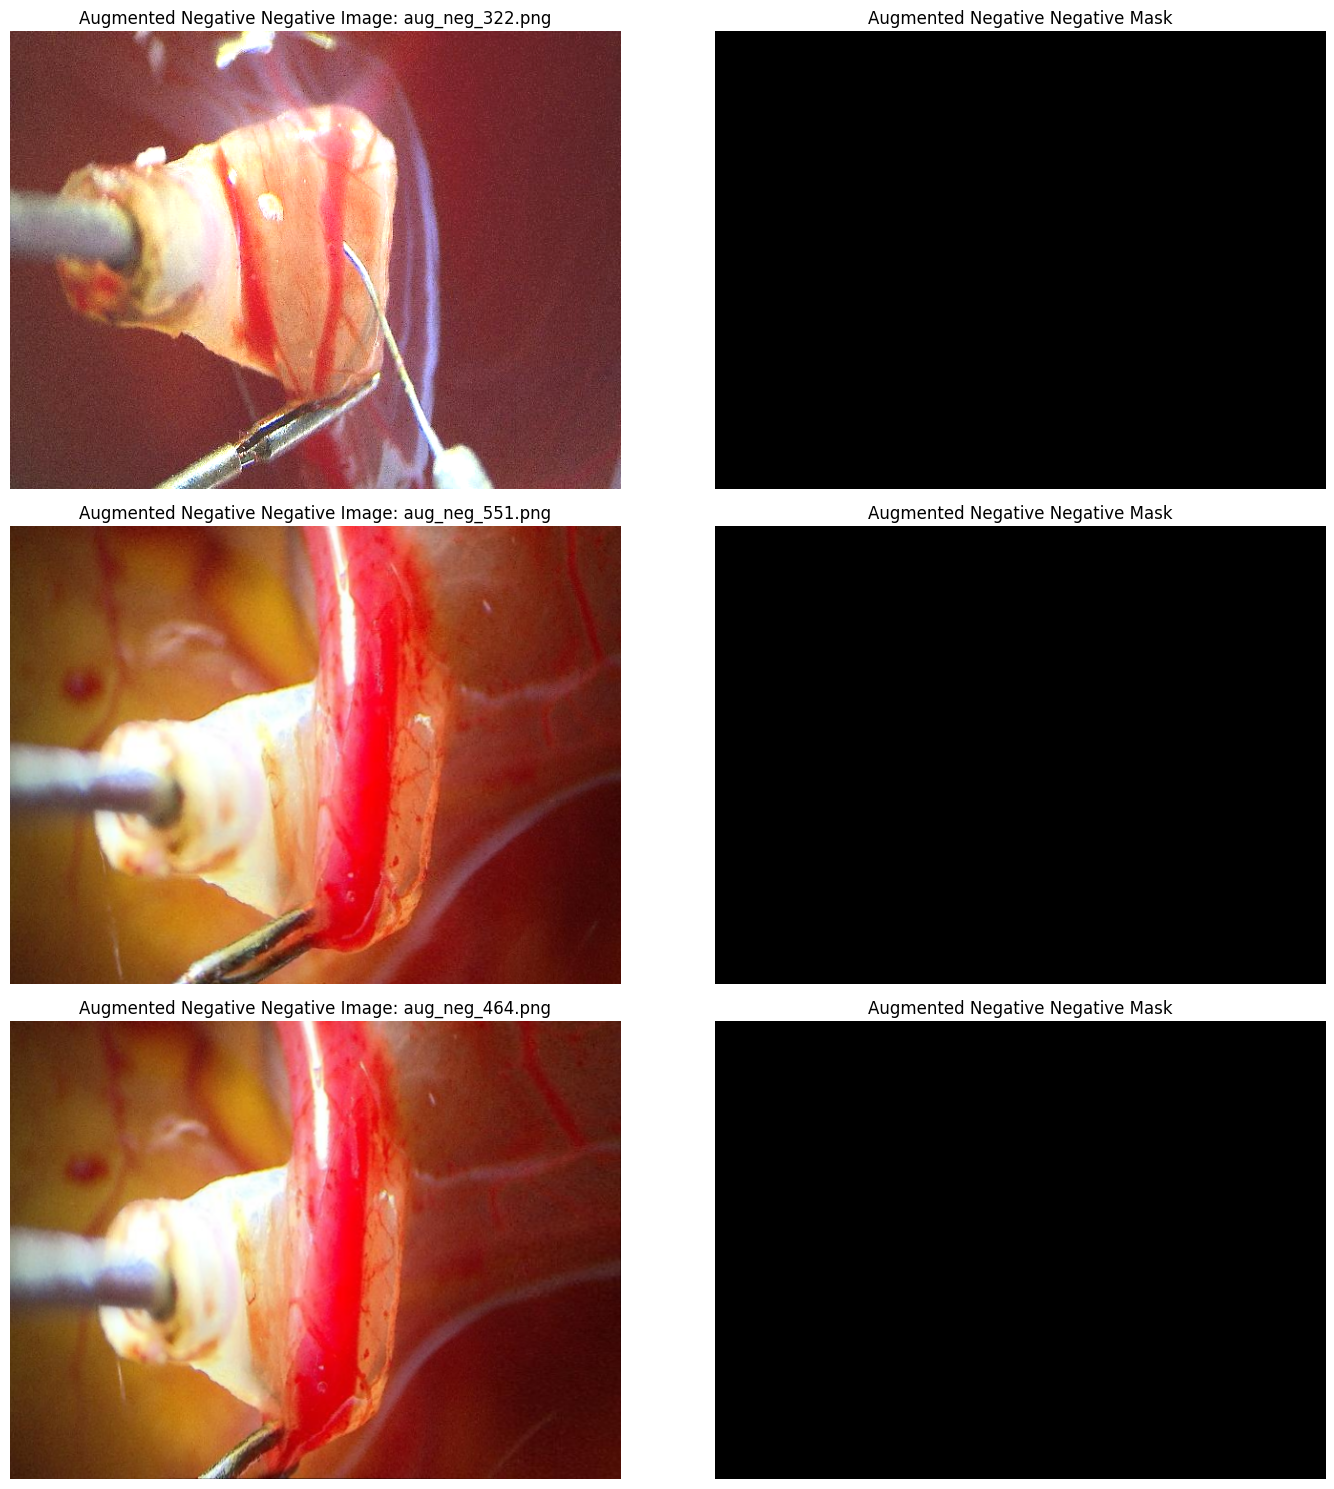


Visualizing train negative samples (original + augmented)...


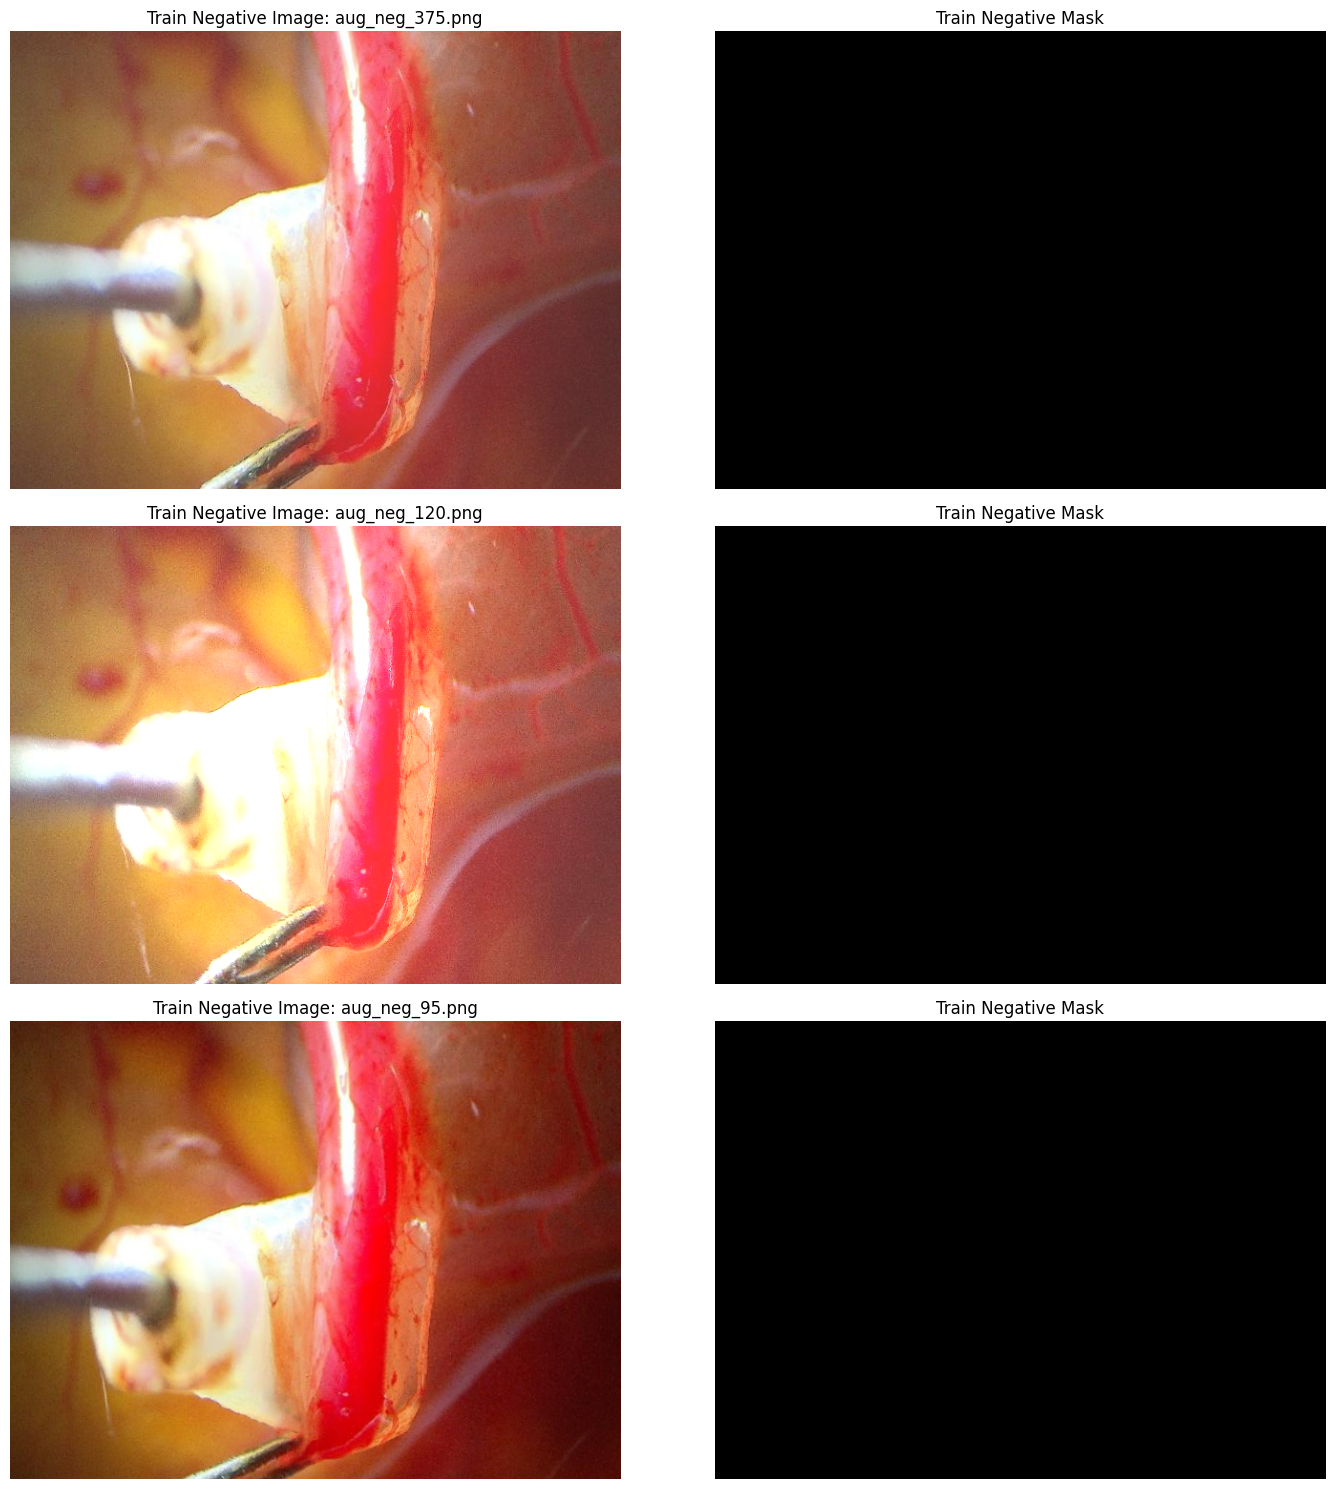


===== Dataset Statistics =====
Original positive samples (all splits): 2552
Original negative samples (all splits): 57
Augmented negative samples (added to train): 683
-----------------------------------------
Total positive samples (all splits): 2552
Total negative samples (all splits, including augmented): 740
Total samples (all splits): 3292
Overall negative to positive ratio: 29.00%

===== Train Split Statistics (After Augmentation) =====
Train positive samples: 2131
Train original negative samples: 26
Train augmented negative samples: 683
Train total negative samples: 709
Train negative to positive ratio: 33.27%


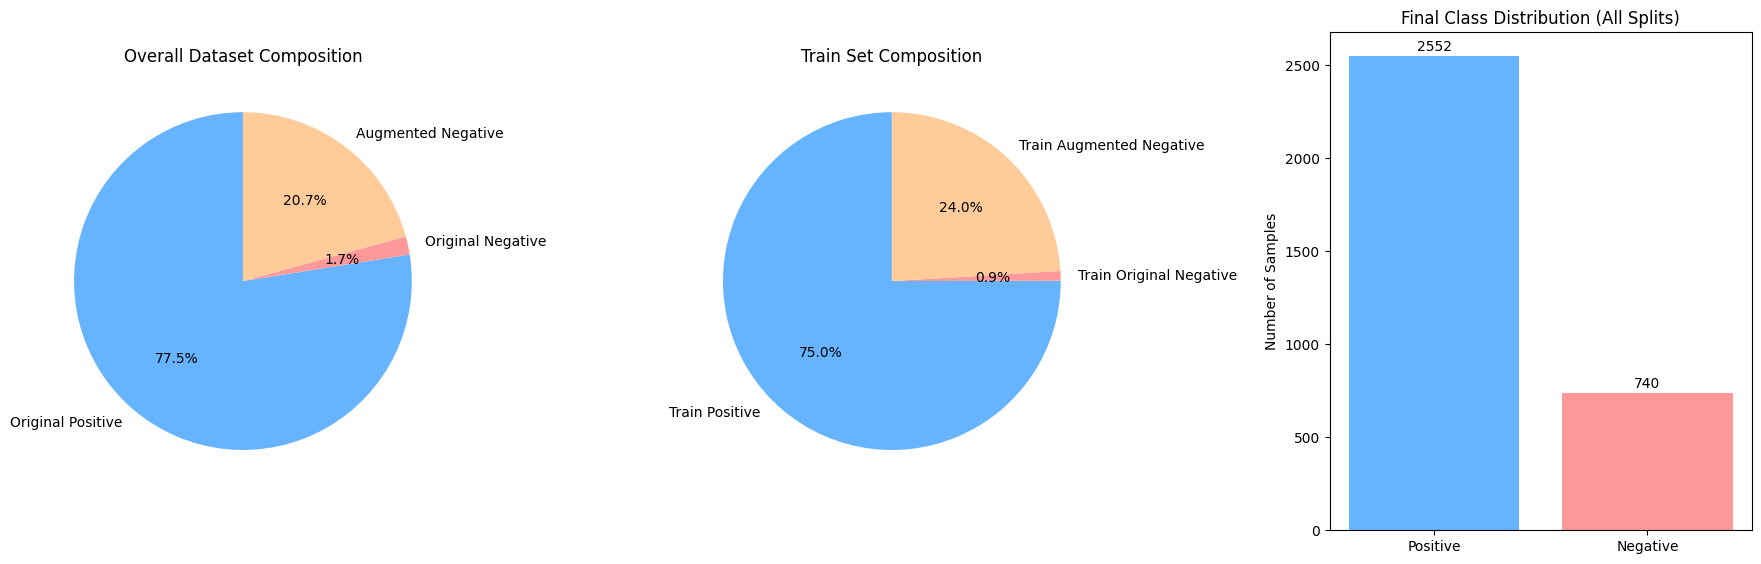


Process completed!

Check the following directories:
- Train images: /content/MLMA-Segmentation-Final-3/train
- Train masks: /content/MLMA-Segmentation-Final-3/train_masks
- Test images: /content/MLMA-Segmentation-Final-3/test
- Test masks: /content/MLMA-Segmentation-Final-3/test_masks
- Valid images: /content/MLMA-Segmentation-Final-3/valid
- Valid masks: /content/MLMA-Segmentation-Final-3/valid_masks
- Augmented negative images: /content/MLMA-Segmentation-Final-3/augmented/images
- Augmented negative masks: /content/MLMA-Segmentation-Final-3/augmented/masks
- Combined train negative images: /content/MLMA-Segmentation-Final-3/train_negative_samples
- Combined train negative masks: /content/MLMA-Segmentation-Final-3/train_negative_masks


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import shutil
from pathlib import Path
from tqdm import tqdm
from pycocotools.coco import COCO
import albumentations as A

BASE_DIR = "/content/MLMA-Segmentation-Final-3"
SPLITS = ["train", "test", "valid"]
AUGMENTED_DIR = os.path.join(BASE_DIR, "augmented")
TRAIN_NEG_SAMPLES_DIR = os.path.join(BASE_DIR, "train_negative_samples")
TRAIN_NEG_MASKS_DIR = os.path.join(BASE_DIR, "train_negative_masks")

def setup_directories():
    os.makedirs(AUGMENTED_DIR, exist_ok=True)

    for split in SPLITS:
        os.makedirs(os.path.join(BASE_DIR, f"{split}_masks"), exist_ok=True)

    os.makedirs(os.path.join(AUGMENTED_DIR, "images"), exist_ok=True)
    os.makedirs(os.path.join(AUGMENTED_DIR, "masks"), exist_ok=True)

    os.makedirs(TRAIN_NEG_SAMPLES_DIR, exist_ok=True)
    os.makedirs(TRAIN_NEG_MASKS_DIR, exist_ok=True)

def process_split(split):
    print(f"\nProcessing {split} split...")

    img_dir = os.path.join(BASE_DIR, split)
    masks_dir = os.path.join(BASE_DIR, f"{split}_masks")
    annotations_file = os.path.join(BASE_DIR, split, "_annotations.coco.json")

    if not os.path.exists(annotations_file):
        print(f"Warning: Annotations file not found for {split} split at {annotations_file}")
        return [], []

    coco = COCO(annotations_file)
    needle_cat_id = 1  # Category ID for needle

    img_ids = coco.getImgIds()
    print(f"Found {len(img_ids)} images in {split} split")

    positive_samples = []
    negative_samples = []

    for img_id in tqdm(img_ids):
        img_info = coco.loadImgs(img_id)[0]
        img_filename = img_info['file_name']
        img_path = os.path.join(img_dir, img_filename)

        if not os.path.exists(img_path):
            print(f"Warning: Image file not found: {img_path}")
            continue

        ann_ids = coco.getAnnIds(imgIds=img_id, catIds=[needle_cat_id])
        needle_anns = coco.loadAnns(ann_ids)

        h, w = img_info['height'], img_info['width']
        mask = np.zeros((h, w), dtype=np.uint8)

        has_needle = False
        if len(needle_anns) > 0:
            has_needle = True
            for ann in needle_anns:
                ann_mask = coco.annToMask(ann)
                mask = np.maximum(mask, ann_mask)

        mask_filename = f"{Path(img_filename).stem}_mask.png"
        mask_path = os.path.join(masks_dir, mask_filename)
        cv2.imwrite(mask_path, mask * 255)

        if has_needle:
            positive_samples.append((img_path, mask_path))
        else:
            negative_samples.append((img_path, mask_path))

            if split == "train":
                neg_img_dest = os.path.join(TRAIN_NEG_SAMPLES_DIR, img_filename)
                shutil.copy2(img_path, neg_img_dest)

                neg_mask_dest = os.path.join(TRAIN_NEG_MASKS_DIR, mask_filename)
                shutil.copy2(mask_path, neg_mask_dest)

    print(f"Completed processing {split} split!")
    print(f"Positive samples: {len(positive_samples)}")
    print(f"Negative samples: {len(negative_samples)}")

    return positive_samples, negative_samples

def augment_data(positive_samples, negative_samples):
    print("\nPerforming data augmentation (negative samples only)...")

    target_negative_ratio = random.uniform(0.3, 0.4)
    target_negative_count = int(len(positive_samples) * target_negative_ratio)

    current_negative_count = len(negative_samples)
    augmentation_count = max(0, target_negative_count - current_negative_count)
    print(f"Target negative samples: {target_negative_count}")
    print(f"Current negative samples: {current_negative_count}")
    print(f"Need to generate {augmentation_count} additional negative samples")

    augmentations = A.Compose([
        A.RandomBrightnessContrast(p=0.5),
        A.ElasticTransform(alpha=1, sigma=50, p=0.5),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(p=0.5),
    ])-

    augmented_samples = []

    if augmentation_count > 0:
        if not negative_samples:
             print("Warning: No negative samples available for augmentation, cannot generate new ones.")
             return augmented_samples

        for idx in tqdm(range(augmentation_count)):
            img_path, mask_path = random.choice(negative_samples)

            image = cv2.imread(img_path)
            if image is None:
                print(f"Warning: Could not read image {img_path}. Skipping augmentation for this sample.")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

            try:
                augmented = augmentations(image=image)
                aug_image = augmented["image"]
            except Exception as e:
                print(f"Warning: Augmentation failed for {img_path}. Error: {e}. Skipping.")
                continue

            aug_img_filename = f"aug_neg_{idx}.png"
            aug_mask_filename = f"aug_neg_{idx}_mask.png"

            aug_img_path = os.path.join(AUGMENTED_DIR, "images", aug_img_filename)
            aug_mask_path = os.path.join(AUGMENTED_DIR, "masks", aug_mask_filename)

            cv2.imwrite(aug_img_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
            cv2.imwrite(aug_mask_path, mask)

            train_neg_img_path = os.path.join(TRAIN_NEG_SAMPLES_DIR, aug_img_filename)
            train_neg_mask_path = os.path.join(TRAIN_NEG_MASKS_DIR, aug_mask_filename)

            cv2.imwrite(train_neg_img_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
            cv2.imwrite(train_neg_mask_path, mask)

            augmented_samples.append((aug_img_path, aug_mask_path, False))

    print(f"Created {len(augmented_samples)} augmented negative samples")
    return augmented_samples

def visualize_samples(samples, num_samples=3, title_prefix="Augmented"):
    if not samples:
        print("No samples to visualize")
        return

    num_to_show = min(num_samples, len(samples))
    if num_to_show == 0:
        print("No samples to visualize")
        return
    vis_samples = random.sample(samples, num_to_show)

    plt.figure(figsize=(15, 5 * num_to_show))

    for i, sample_data in enumerate(vis_samples):
        if len(sample_data) == 3:
            img_path, mask_path, is_positive = sample_data
        elif len(sample_data) == 2:
             img_path, mask_path = sample_data
             is_positive = True
             print(f"Warning: Sample tuple has only 2 elements for {img_path}. Assuming positive.")
        else:
            print(f"Warning: Unexpected sample format: {sample_data}. Skipping visualization.")
            continue

        if not os.path.exists(img_path):
            print(f"Warning: Image file not found for visualization: {img_path}")
            continue
        if not os.path.exists(mask_path):
            print(f"Warning: Mask file not found for visualization: {mask_path}")
            continue

        image = cv2.imread(img_path)
        if image is None:
             print(f"Warning: Could not read image {img_path} for visualization.")
             continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"Warning: Could not read mask {mask_path} for visualization.")
            mask = np.zeros_like(image[:,:,0])

        sample_type = "Positive" if is_positive else "Negative"

        plt.subplot(num_to_show, 2, i*2+1)
        plt.imshow(image)
        plt.title(f"{title_prefix} {sample_type} Image: {os.path.basename(img_path)}")
        plt.axis('off')

        plt.subplot(num_to_show, 2, i*2+2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"{title_prefix} {sample_type} Mask")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def visualize_train_negatives(num_samples=3):
    if not os.path.exists(TRAIN_NEG_SAMPLES_DIR):
        print(f"Train negative samples directory does not exist: {TRAIN_NEG_SAMPLES_DIR}")
        return

    img_files = os.listdir(TRAIN_NEG_SAMPLES_DIR)
    if not img_files:
        print("No train negative samples to visualize in the directory.")
        return

    num_to_show = min(num_samples, len(img_files))
    if num_to_show == 0:
        print("No train negative samples to visualize.")
        return
    vis_samples = random.sample(img_files, num_to_show)

    plt.figure(figsize=(15, 5 * num_to_show))

    for i, img_filename in enumerate(vis_samples):
        img_path = os.path.join(TRAIN_NEG_SAMPLES_DIR, img_filename)
        if img_filename.startswith("aug_neg_"):
            mask_filename = f"{Path(img_filename).stem}_mask.png"
        else:
             mask_filename = f"{Path(img_filename).stem}_mask.png"

        mask_path = os.path.join(TRAIN_NEG_MASKS_DIR, mask_filename)

        if os.path.exists(img_path) and os.path.exists(mask_path):
            image = cv2.imread(img_path)
            if image is None:
                print(f"Warning: Could not read train negative image: {img_path}")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                print(f"Warning: Could not read train negative mask: {mask_path}")
                mask = np.zeros_like(image[:,:,0])

            plt.subplot(num_to_show, 2, i*2+1)
            plt.imshow(image)
            plt.title(f"Train Negative Image: {img_filename}")
            plt.axis('off')

            plt.subplot(num_to_show, 2, i*2+2)
            plt.imshow(mask, cmap='gray')
            plt.title(f"Train Negative Mask")
            plt.axis('off')
        else:
            print(f"Warning: Image or mask file missing for {img_filename}")
            if not os.path.exists(img_path): print(f"  Missing: {img_path}")
            if not os.path.exists(mask_path): print(f"  Missing: {mask_path}")

    plt.tight_layout()
    plt.show()

def calculate_statistics(all_splits_data, augmented_samples):
    total_original_pos = 0
    total_original_neg = 0
    train_pos = 0
    train_orig_neg = 0

    for split, (pos, neg) in all_splits_data:
         if pos: total_original_pos += len(pos)
         if neg: total_original_neg += len(neg)
         if split == "train":
             if pos: train_pos = len(pos)
             if neg: train_orig_neg = len(neg)

    aug_neg = len(augmented_samples)

    train_total_neg = train_orig_neg + aug_neg
    train_neg_ratio = train_total_neg / train_pos if train_pos > 0 else 0

    total_pos = total_original_pos
    total_neg = total_original_neg + aug_neg
    total_samples = total_pos + total_neg
    overall_neg_ratio = total_neg / total_pos if total_pos > 0 else 0

    print("\n===== Dataset Statistics =====")
    print(f"Original positive samples (all splits): {total_original_pos}")
    print(f"Original negative samples (all splits): {total_original_neg}")
    print(f"Augmented negative samples (added to train): {aug_neg}")
    print(f"-----------------------------------------")
    print(f"Total positive samples (all splits): {total_pos}")
    print(f"Total negative samples (all splits, including augmented): {total_neg}")
    print(f"Total samples (all splits): {total_samples}")
    print(f"Overall negative to positive ratio: {overall_neg_ratio:.2%}")

    print("\n===== Train Split Statistics (After Augmentation) =====")
    print(f"Train positive samples: {train_pos}")
    print(f"Train original negative samples: {train_orig_neg}")
    print(f"Train augmented negative samples: {aug_neg}")
    print(f"Train total negative samples: {train_total_neg}")
    print(f"Train negative to positive ratio: {train_neg_ratio:.2%}")

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    labels_overall = ['Original Positive', 'Original Negative', 'Augmented Negative']
    sizes_overall = [total_original_pos, total_original_neg, aug_neg]
    labels_overall = [l for l, s in zip(labels_overall, sizes_overall) if s > 0]
    sizes_overall = [s for s in sizes_overall if s > 0]
    if sizes_overall:
        colors_overall = ['#66b3ff', '#ff9999', '#ffcc99'][:len(sizes_overall)]
        plt.pie(sizes_overall, labels=labels_overall, colors=colors_overall, autopct='%1.1f%%', startangle=90)
        plt.title('Overall Dataset Composition')
    else:
        plt.text(0.5, 0.5, 'No data to display', horizontalalignment='center', verticalalignment='center')
        plt.title('Overall Dataset Composition (No Data)')

    plt.subplot(1, 3, 2)
    labels_train = ['Train Positive', 'Train Original Negative', 'Train Augmented Negative']
    sizes_train = [train_pos, train_orig_neg, aug_neg]
    labels_train = [l for l, s in zip(labels_train, sizes_train) if s > 0]
    sizes_train = [s for s in sizes_train if s > 0]
    if sizes_train:
        colors_train = ['#66b3ff', '#ff9999', '#ffcc99'][:len(sizes_train)]
        plt.pie(sizes_train, labels=labels_train, colors=colors_train, autopct='%1.1f%%', startangle=90)
        plt.title('Train Set Composition')
    else:
        plt.text(0.5, 0.5, 'No training data to display', horizontalalignment='center', verticalalignment='center')
        plt.title('Train Set Composition (No Data)')

    plt.subplot(1, 3, 3)
    categories = ['Positive', 'Negative']
    counts = [total_pos, total_neg]
    colors_bar = ['#66b3ff', '#ff9999']
    if any(c > 0 for c in counts):
        plt.bar(categories, counts, color=colors_bar)
        plt.title('Final Class Distribution (All Splits)')
        plt.ylabel('Number of Samples')
        for i, count in enumerate(counts):
            plt.text(i, count + (0.01 * max(counts) if max(counts) > 0 else 1), str(count), ha='center')
    else:
         plt.text(0.5, 0.5, 'No data for bar chart', horizontalalignment='center', verticalalignment='center')
         plt.title('Final Class Distribution (No Data)')

    plt.tight_layout(pad=2.0)
    plt.show()

def main():
    setup_directories()

    all_splits_data = []
    for split in SPLITS:
        split_data = process_split(split)
        all_splits_data.append((split, split_data))

    augmented_samples = []
    train_positive_samples = []
    train_negative_samples = []
    for split_name, (pos_samples, neg_samples) in all_splits_data:
        if split_name == "train":
            train_positive_samples = pos_samples
            train_negative_samples = neg_samples
            break

    if train_positive_samples or train_negative_samples:
        print(f"\nAugmenting train split data...")
        augmented_samples = augment_data(train_positive_samples, train_negative_samples)
    else:
        print("\nNo training data found to augment.")

    if augmented_samples:
        print("\nVisualizing some augmented negative samples...")
        visualize_samples(augmented_samples, num_samples=3, title_prefix="Augmented Negative")
    else:
        print("\nNo augmented samples were created to visualize.")

    print("\nVisualizing train negative samples (original + augmented)...")
    visualize_train_negatives(num_samples=3)

    calculate_statistics(all_splits_data, augmented_samples)

    print("\nProcess completed!")
    print(f"\nCheck the following directories:")
    for split in SPLITS:
        print(f"- {split.capitalize()} images: {os.path.join(BASE_DIR, split)}")
        print(f"- {split.capitalize()} masks: {os.path.join(BASE_DIR, f'{split}_masks')}")
    print(f"- Augmented negative images: {os.path.join(AUGMENTED_DIR, 'images')}")
    print(f"- Augmented negative masks: {os.path.join(AUGMENTED_DIR, 'masks')}")
    print(f"- Combined train negative images: {TRAIN_NEG_SAMPLES_DIR}")
    print(f"- Combined train negative masks: {TRAIN_NEG_MASKS_DIR}")

if __name__ == "__main__":
    if not os.path.isdir(BASE_DIR):
        print(f"ERROR: Base directory not found: {BASE_DIR}")
        print("Please ensure the BASE_DIR variable points to the correct dataset location.")
    else:
        main()

In [ ]:
!pip install -q segmentation_models_pytorch

In [ ]:
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import gc
import torch.cuda.amp as amp
from sklearn.metrics import precision_recall_curve, average_precision_score

torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

BASE_DIR = "/content/MLMA-Segmentation-Final-3"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TRAIN_MASKS_DIR = os.path.join(BASE_DIR, "train_masks")
VALID_DIR = os.path.join(BASE_DIR, "valid")
VALID_MASKS_DIR = os.path.join(BASE_DIR, "valid_masks")
MODEL_SAVE_DIR = os.path.join(BASE_DIR, "models")
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

BATCH_SIZE = 1
ACCUMULATION_STEPS = 2
LEARNING_RATE = 1e-4
NUM_EPOCHS = 10
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
USE_SUBSET = True
SUBSET_SIZE = 400
EARLY_STOPPING_PATIENCE = 5

try:
    torch.backends.cuda.enable_mem_efficient_sdp(True)
    torch.backends.cuda.enable_flash_sdp(True)
    print("Memory efficient attention enabled")
except:
    print("Memory efficient attention not available in this PyTorch version")

print(f"Using device: {DEVICE}")

def print_memory_info():
    if torch.cuda.is_available():
        print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
        print(f"GPU memory reserved: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")
        print(f"GPU max memory allocated: {torch.cuda.max_memory_allocated() / 1024**2:.2f} MB")

def clear_gpu_cache():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        gc.collect()

train_transform = A.Compose([
    A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

class NeedleSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, use_subset=False, subset_size=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = []
        self.masks = []
        self.is_negative = []

        img_files = os.listdir(image_dir)

        if use_subset and subset_size is not None:
            random.shuffle(img_files)
            img_files = img_files[:min(subset_size, len(img_files))]

        for img_file in img_files:
            if img_file.endswith((".png", ".jpg", ".jpeg")) and not img_file.startswith("."):
                mask_file = f"{os.path.splitext(img_file)[0]}_mask.png"
                mask_path = os.path.join(mask_dir, mask_file)

                if os.path.exists(mask_path):
                    img_path = os.path.join(image_dir, img_file)
                    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                    is_neg = np.sum(mask) == 0
                    del mask

                    self.images.append(img_path)
                    self.masks.append(mask_path)
                    self.is_negative.append(is_neg)

        total_samples = len(self.images)
        neg_samples = sum(self.is_negative)
        pos_samples = total_samples - neg_samples
        print(f"Dataset created with {total_samples} total samples")
        print(f"  - Positive samples: {pos_samples}")
        print(f"  - Negative samples: {neg_samples}")
        print(f"  - Negative to positive ratio: {neg_samples/pos_samples:.2%}" if pos_samples > 0 else "  - No positive samples")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        mask_path = self.masks[idx]

        try:
            image = cv2.imread(img_path)
            if image is None:
                print(f"Failed to load image: {img_path}")
                raise ValueError(f"Failed to load image: {img_path}")

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                print(f"Failed to load mask: {mask_path}")
                raise ValueError(f"Failed to load mask: {mask_path}")

            if image.shape[:2] != mask.shape[:2]:
                print(f"Dimension mismatch: {img_path} {image.shape} vs {mask_path} {mask.shape}")
                mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

            mask = mask / 255.0

            if self.transform:
                augmented = self.transform(image=image, mask=mask)
                image = augmented["image"]
                mask = augmented["mask"]

            mask = mask.unsqueeze(0)

            return image, mask, self.is_negative[idx]

        except Exception as e:
            print(f"Error processing file {img_path} or {mask_path}: {str(e)}")
            fallback_idx = (idx + 1) % len(self.images)
            return self.__getitem__(fallback_idx)

def dice_loss(pred, target, smooth=1.0):
    pred = torch.sigmoid(pred)
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    dice_coef = (2.0 * intersection + smooth) / (pred.sum() + target.sum() + smooth)
    return 1.0 - dice_coef

def dice_coefficient(pred, target, threshold=0.5, smooth=1.0):
    pred = torch.sigmoid(pred) > threshold
    pred = pred.float()
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    dice_coef = (2.0 * intersection + smooth) / (pred.sum() + target.sum() + smooth)
    return dice_coef

def combined_loss(pred, target):
    bce_loss = nn.BCEWithLogitsLoss()(pred, target)
    dice = dice_loss(pred, target)
    return 0.5 * bce_loss + 0.5 * dice

def train_fn(model, loader, optimizer, device, epoch, scaler):
    model.train()
    total_loss = 0
    dice_scores = []
    optimizer.zero_grad()

    pbar = tqdm(loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}", leave=True)
    for idx, (images, masks, is_negative) in enumerate(pbar):
        images = images.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        with amp.autocast():
            outputs = model(images)
            loss = combined_loss(outputs, masks)
            loss = loss / ACCUMULATION_STEPS

        scaler.scale(loss).backward()

        if (idx + 1) % ACCUMULATION_STEPS == 0 or (idx + 1 == len(loader)):
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        actual_loss = loss.item() * ACCUMULATION_STEPS
        total_loss += actual_loss

        with torch.no_grad():
            dice = dice_coefficient(outputs, masks).item()
            dice_scores.append(dice)

        pbar.set_postfix(loss=actual_loss, dice=dice)

        del images, masks, outputs, loss

        if torch.cuda.is_available() and (idx + 1) % 10 == 0:
            if torch.cuda.memory_allocated() > 0.8 * torch.cuda.get_device_properties(0).total_memory:
                clear_gpu_cache()

    avg_loss = total_loss / len(loader)
    avg_dice = sum(dice_scores) / len(dice_scores) if dice_scores else 0

    clear_gpu_cache()
    print_memory_info()

    return avg_loss, avg_dice

def evaluate(model, loader, device):
    model.eval()
    total_loss = 0
    dice_scores = []

    with torch.no_grad():
        for images, masks, is_negative in tqdm(loader, desc="Validation"):
            images = images.to(device, non_blocking=True)
            masks = masks.to(device, non_blocking=True)
            outputs = model(images)
            loss = combined_loss(outputs, masks)
            total_loss += loss.item()
            dice = dice_coefficient(outputs, masks).item()
            dice_scores.append(dice)
            del images, masks, outputs, loss

    clear_gpu_cache()

    avg_loss = total_loss / len(loader)
    avg_dice = sum(dice_scores) / len(dice_scores) if dice_scores else 0

    return avg_loss, avg_dice

def plot_predictions(model, val_dataset, device, num_samples=3):
    model.eval()
    indices = random.sample(range(len(val_dataset)), min(num_samples, len(val_dataset)))
    plt.figure(figsize=(15, 5 * num_samples))

    for i, idx in enumerate(indices):
        image, mask, is_neg = val_dataset[idx]

        with torch.no_grad():
            x = image.unsqueeze(0).to(device)
            pred = model(x)
            pred = torch.sigmoid(pred)
            pred = (pred > 0.5).float()
            pred = pred.cpu().squeeze().numpy()
            del x
            clear_gpu_cache()

        image = image.permute(1, 2, 0).cpu().numpy()
        mask = mask.squeeze().cpu().numpy()

        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0, 1)

        plt.subplot(num_samples, 3, i*3+1)
        plt.imshow(image)
        plt.title(f"{'Negative' if is_neg else 'Positive'} Image")

        plt.subplot(num_samples, 3, i*3+2)
        plt.imshow(mask, cmap='gray')
        plt.title("Ground Truth Mask")

        plt.subplot(num_samples, 3, i*3+3)
        plt.imshow(pred, cmap='gray')
        plt.title("Prediction")

    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_SAVE_DIR, "predictions.png"))
    plt.close()

def plot_precision_recall_curve(model, val_loader, device):
    model.eval()
    all_preds = []
    all_masks = []

    with torch.no_grad():
        for images, masks, _ in tqdm(val_loader, desc="Calculating Precision-Recall"):
            images = images.to(device, non_blocking=True)
            outputs = model(images)
            outputs = torch.sigmoid(outputs)
            preds = outputs.cpu().numpy()
            masks_np = masks.cpu().numpy()
            all_preds.extend(preds.flatten())
            all_masks.extend(masks_np.flatten())
            del images, outputs, preds, masks_np

            if len(all_preds) % 1000 == 0:
                clear_gpu_cache()

    all_preds = np.array(all_preds)
    all_masks = np.array(all_masks)

    precision, recall, thresholds = precision_recall_curve(all_masks, all_preds)
    avg_precision = average_precision_score(all_masks, all_preds)

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-7)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    best_f1 = f1_scores[best_idx]

    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, 'b', label=f'Needle = {avg_precision:.3f}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.savefig(os.path.join(MODEL_SAVE_DIR, "precision_recall_curve.png"))
    plt.close()

    del all_preds, all_masks, precision, recall, thresholds
    gc.collect()

    return best_threshold, avg_precision

def main():
    print("Initial memory status:")
    print_memory_info()

    scaler = amp.GradScaler()

    train_dataset = NeedleSegmentationDataset(
        image_dir=TRAIN_DIR,
        mask_dir=TRAIN_MASKS_DIR,
        transform=train_transform,
        use_subset=USE_SUBSET,
        subset_size=SUBSET_SIZE
    )

    val_dataset = NeedleSegmentationDataset(
        image_dir=VALID_DIR,
        mask_dir=VALID_MASKS_DIR,
        transform=val_transform,
        use_subset=USE_SUBSET,
        subset_size=SUBSET_SIZE//4
    )

    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=0,
        pin_memory=False,
        drop_last=False
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=0,
        pin_memory=False,
        drop_last=False
    )

    model = smp.Unet(
        encoder_name="mobilenet_v2",
        encoder_weights="imagenet",
        in_channels=3,
        classes=1,
        decoder_attention_type=None
    )
    model = model.to(DEVICE)

    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='max',
        factor=0.5,
        patience=3,
        verbose=True
    )

    checkpoint_path = os.path.join(MODEL_SAVE_DIR, "unet_checkpoint.pth")
    start_epoch = 0
    best_dice = 0.0
    no_improve_epochs = 0

    if os.path.exists(checkpoint_path):
        print(f"Loading checkpoint from {checkpoint_path}")
        try:
            checkpoint = torch.load(checkpoint_path)
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
            start_epoch = checkpoint['epoch'] + 1
            best_dice = checkpoint['best_dice']
            print(f"Resuming from epoch {start_epoch}, best dice so far: {best_dice:.4f}")
        except Exception as e:
            print(f"Error loading checkpoint: {e}")
            print("Starting training from scratch")

    train_losses = []
    val_losses = []
    train_dices = []
    val_dices = []

    for epoch in range(start_epoch, NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS} - Memory before training:")
        print_memory_info()

        train_loss, train_dice = train_fn(model, train_loader, optimizer, DEVICE, epoch, scaler)
        train_losses.append(train_loss)
        train_dices.append(train_dice)

        clear_gpu_cache()

        val_loss, val_dice = evaluate(model, val_loader, DEVICE)
        val_losses.append(val_loss)
        val_dices.append(val_dice)

        print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
        print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dice:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Dice: {val_dice:.4f}")

        scheduler.step(val_dice)

        if val_dice > best_dice:
            best_dice = val_dice
            torch.save(model.state_dict(), os.path.join(MODEL_SAVE_DIR, "unet_best_model.pth"))
            print(f"Saved new best model with Dice score: {best_dice:.4f}")
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
            print(f"No improvement for {no_improve_epochs} epochs")

        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss,
            'train_dice': train_dice,
            'val_dice': val_dice,
            'best_dice': best_dice
        }, os.path.join(MODEL_SAVE_DIR, "unet_checkpoint.pth"))

        if no_improve_epochs >= EARLY_STOPPING_PATIENCE:
            print(f"Early stopping after {no_improve_epochs} epochs without improvement")
            break

        clear_gpu_cache()

    history = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_dices': train_dices,
        'val_dices': val_dices
    }

    np.save(os.path.join(MODEL_SAVE_DIR, "training_history.npy"), history)

    try:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Loss vs. Epoch')

        plt.subplot(1, 2, 2)
        plt.plot(train_dices, label='Train Dice')
        plt.plot(val_dices, label='Val Dice')
        plt.xlabel('Epoch')
        plt.ylabel('Dice Coefficient')
        plt.legend()
        plt.title('Dice Coefficient vs. Epoch')

        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_SAVE_DIR, "training_metrics.png"))
        plt.close()
    except Exception as e:
        print(f"Error plotting training metrics: {e}")

    print("Loading best model for visualization...")
    try:
        best_model = smp.Unet(
            encoder_name="mobilenet_v2",
            encoder_weights="imagenet",
            in_channels=3,
            classes=1,
            decoder_attention_type=None
        )
        best_model.load_state_dict(torch.load(os.path.join(MODEL_SAVE_DIR, "unet_best_model.pth")))
        best_model = best_model.to(DEVICE)

        try:
            plot_predictions(best_model, val_dataset, DEVICE, num_samples=3)
        except Exception as e:
            print(f"Error plotting predictions: {e}")

        try:
            print("\nGenerating Precision-Recall Curve...")
            best_threshold, avg_precision = plot_precision_recall_curve(best_model, val_loader, DEVICE)
            print(f"Average Precision (AP): {avg_precision:.4f}")
            print(f"Best threshold for F1 score: {best_threshold:.4f}")
        except Exception as e:
            print(f"Error generating precision-recall curve: {e}")
    except Exception as e:
        print(f"Error loading best model: {e}")

    print(f"Training completed. Best validation Dice score: {best_dice:.4f}")
    print(f"Model saved to {os.path.join(MODEL_SAVE_DIR, 'unet_best_model.pth')}")
    print("Final memory status:")
    print_memory_info()

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"An error occurred during execution: {e}")
        clear_gpu_cache()

Memory efficient attention enabled
Using device: cuda
Initial memory status:
GPU memory allocated: 0.00 MB
GPU memory reserved: 0.00 MB
GPU max memory allocated: 0.00 MB


`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.


Dataset created with 399 total samples
  - Positive samples: 394
  - Negative samples: 5
  - Negative to positive ratio: 1.27%
Dataset created with 100 total samples
  - Positive samples: 93
  - Negative samples: 7
  - Negative to positive ratio: 7.53%



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.



Epoch 1/10 - Memory before training:
GPU memory allocated: 25.52 MB
GPU memory reserved: 28.00 MB
GPU max memory allocated: 25.52 MB


Epoch 1/10: 100%|██████████| 399/399 [00:18<00:00, 21.27it/s, dice=0.00347, loss=0.598]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.60 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 55.91it/s]


Epoch 1/10
Train Loss: 0.6666, Train Dice: 0.4070
Val Loss: 0.5797, Val Dice: 0.6142
Saved new best model with Dice score: 0.6142

Epoch 2/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.60 MB


Epoch 2/10: 100%|██████████| 399/399 [00:17<00:00, 23.09it/s, dice=0.907, loss=0.441]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 66.83it/s]


Epoch 2/10
Train Loss: 0.5211, Train Dice: 0.7407
Val Loss: 0.4936, Val Dice: 0.5956
No improvement for 1 epochs

Epoch 3/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Epoch 3/10: 100%|██████████| 399/399 [00:16<00:00, 24.25it/s, dice=0.829, loss=0.353]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 65.76it/s]


Epoch 3/10
Train Loss: 0.4233, Train Dice: 0.7859
Val Loss: 0.3849, Val Dice: 0.7284
Saved new best model with Dice score: 0.7284

Epoch 4/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Epoch 4/10: 100%|██████████| 399/399 [00:17<00:00, 23.13it/s, dice=0.908, loss=0.169]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 65.55it/s]


Epoch 4/10
Train Loss: 0.2691, Train Dice: 0.8389
Val Loss: 0.2315, Val Dice: 0.7730
Saved new best model with Dice score: 0.7730

Epoch 5/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Epoch 5/10: 100%|██████████| 399/399 [00:17<00:00, 23.40it/s, dice=0.895, loss=0.0978]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 53.67it/s]


Epoch 5/10
Train Loss: 0.1447, Train Dice: 0.8686
Val Loss: 0.1598, Val Dice: 0.7981
Saved new best model with Dice score: 0.7981

Epoch 6/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Epoch 6/10: 100%|██████████| 399/399 [00:16<00:00, 24.05it/s, dice=0.932, loss=0.0841]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 64.57it/s]


Epoch 6/10
Train Loss: 0.0979, Train Dice: 0.8857
Val Loss: 0.1461, Val Dice: 0.7710
No improvement for 1 epochs

Epoch 7/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Epoch 7/10: 100%|██████████| 399/399 [00:17<00:00, 23.15it/s, dice=0.949, loss=0.043]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 66.49it/s]


Epoch 7/10
Train Loss: 0.0819, Train Dice: 0.8902
Val Loss: 0.1318, Val Dice: 0.7808
No improvement for 2 epochs

Epoch 8/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 200.96 MB


Epoch 8/10: 100%|██████████| 399/399 [00:17<00:00, 23.30it/s, dice=0.919, loss=0.0562]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 205.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 54.69it/s]


Epoch 8/10
Train Loss: 0.0731, Train Dice: 0.8948
Val Loss: 0.1458, Val Dice: 0.7640
No improvement for 3 epochs

Epoch 9/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 205.96 MB


Epoch 9/10: 100%|██████████| 399/399 [00:16<00:00, 23.75it/s, dice=0.913, loss=0.0571]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 205.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 65.06it/s]


Epoch 9/10
Train Loss: 0.0690, Train Dice: 0.8943
Val Loss: 0.1161, Val Dice: 0.7942
No improvement for 4 epochs

Epoch 10/10 - Memory before training:
GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 205.96 MB


Epoch 10/10: 100%|██████████| 399/399 [00:17<00:00, 23.00it/s, dice=0.888, loss=0.064]


GPU memory allocated: 77.44 MB
GPU memory reserved: 108.00 MB
GPU max memory allocated: 205.96 MB


Validation: 100%|██████████| 100/100 [00:01<00:00, 63.68it/s]


Epoch 10/10
Train Loss: 0.0580, Train Dice: 0.9122
Val Loss: 0.1264, Val Dice: 0.7727
No improvement for 5 epochs
Early stopping after 5 epochs without improvement
Loading best model for visualization...

Generating Precision-Recall Curve...


Calculating Precision-Recall: 100%|██████████| 100/100 [00:02<00:00, 43.14it/s]


Average Precision (AP): 0.9153
Best threshold for F1 score: 0.3622
Training completed. Best validation Dice score: 0.7981
Model saved to /content/MLMA-Segmentation-Final-3/models/unet_best_model.pth
Final memory status:
GPU memory allocated: 103.91 MB
GPU memory reserved: 170.00 MB
GPU max memory allocated: 205.96 MB


Using device: cuda
Setting up dataset and model...
Dataset created with 100 samples
Generating simplified precision-recall curve...


Calculating Precision-Recall: 100%|██████████| 100/100 [00:03<00:00, 32.54it/s]


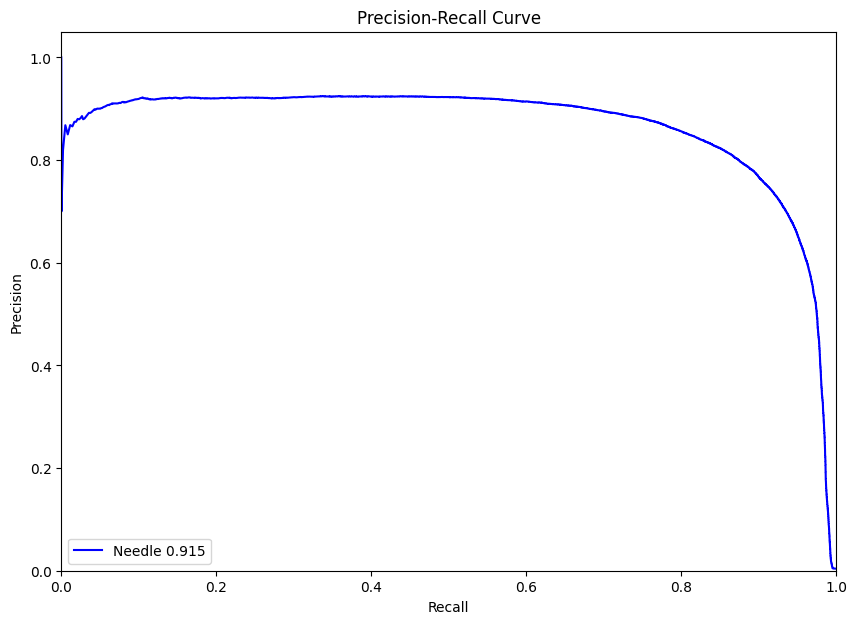

Plot saved to: /content/MLMA-Segmentation-Final-3/models/simplified_precision_recall_curve.png


In [ ]:
import os
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random
import segmentation_models_pytorch as smp
from sklearn.metrics import precision_recall_curve
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2

BASE_DIR = "/content/MLMA-Segmentation-Final-3"
VALID_DIR = os.path.join(BASE_DIR, "valid")
VALID_MASKS_DIR = os.path.join(BASE_DIR, "valid_masks")
MODEL_SAVE_DIR = os.path.join(BASE_DIR, "models")
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

BATCH_SIZE = 1
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
USE_SUBSET = True
SUBSET_SIZE = 100

print(f"Using device: {DEVICE}")

def clear_gpu_cache():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        gc.collect()

val_transform = A.Compose([
    A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])


class NeedleSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, use_subset=False, subset_size=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform

        self.images = []
        self.masks = []
        self.is_negative = []

        img_files = os.listdir(image_dir)

        if use_subset and subset_size is not None:
            random.shuffle(img_files)
            img_files = img_files[:min(subset_size, len(img_files))]

        for img_file in img_files:
            if img_file.endswith((".png", ".jpg", ".jpeg")) and not img_file.startswith("."):
                mask_file = f"{os.path.splitext(img_file)[0]}_mask.png"
                mask_path = os.path.join(mask_dir, mask_file)

                if os.path.exists(mask_path):
                    img_path = os.path.join(image_dir, img_file)

                    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                    is_neg = np.sum(mask) == 0

                    # Free memory
                    del mask
                    self.images.append(img_path)
                    self.masks.append(mask_path)
                    self.is_negative.append(is_neg)

        print(f"Dataset created with {len(self.images)} samples")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        mask_path = self.masks[idx]

        try:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            # Normalize mask to [0, 1]
            mask = mask / 255.0

            if self.transform:
                augmented = self.transform(image=image, mask=mask)
                image = augmented["image"]
                mask = augmented["mask"]

            mask = mask.unsqueeze(0)

            return image, mask, self.is_negative[idx]

        except Exception as e:
            print(f"Error processing file {img_path} or {mask_path}: {str(e)}")
            fallback_idx = (idx + 1) % len(self.images)
            return self.__getitem__(fallback_idx)

def plot_simplified_precision_recall_curve(model, val_loader, device, display_in_notebook=True):
    """Plot a simplified precision-recall curve with just 'Needle 0.9' as label"""
    model.eval()

    # Lists to store all predictions and ground truth
    all_preds = []
    all_masks = []

    with torch.no_grad():
        for images, masks, _ in tqdm(val_loader, desc="Calculating Precision-Recall"):
            images = images.to(device, non_blocking=True)

            outputs = model(images)
            outputs = torch.sigmoid(outputs)

            preds = outputs.cpu().numpy()
            masks_np = masks.cpu().numpy()

            all_preds.extend(preds.flatten())
            all_masks.extend(masks_np.flatten())

            del images, outputs, preds, masks_np

            if len(all_preds) % 1000 == 0:
                clear_gpu_cache()


    all_preds = np.array(all_preds)
    all_masks = np.array(all_masks)

    # Calculate precision and recall for different thresholds
    precision, recall, _ = precision_recall_curve(all_masks, all_preds)

    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, 'b', label='Needle 0.915')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(False)

    plt.legend(loc='lower left')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    save_path = os.path.join(MODEL_SAVE_DIR, "simplified_precision_recall_curve.png")
    plt.savefig(save_path)

    if display_in_notebook:
        plt.show()
    else:
        plt.close()

    del all_preds, all_masks, precision, recall
    gc.collect()

    return save_path  # Return the path where the image was saved

# Main execution block
print("Setting up dataset and model...")


val_dataset = NeedleSegmentationDataset(
    image_dir=VALID_DIR,
    mask_dir=VALID_MASKS_DIR,
    transform=val_transform,
    use_subset=USE_SUBSET,
    subset_size=SUBSET_SIZE
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=False
)

# Initialize model
model = smp.Unet(
    encoder_name="mobilenet_v2",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1,
    decoder_attention_type=None
)

model.load_state_dict(torch.load(os.path.join(MODEL_SAVE_DIR, "unet_best_model.pth")))
model = model.to(DEVICE)

print("Generating simplified precision-recall curve...")
save_path = plot_simplified_precision_recall_curve(model, val_loader, DEVICE, display_in_notebook=True)
print(f"Plot saved to: {save_path}")